# 15.14 Additional reading 

The following notes sketch out the statistical theory underlying confidence interval construction and hypothesis testing using the log-likelihood ratio. This material is not examinable. 

These notes are intended to draw connections between the previous material surrounding maximum likelihood and the material concerning frequentist inference. 


## 15.14.1 Likelihood for simple logistic regression

**Data:** We have a sample of $n$ binary observations $y_1, ..., y_n$. We will consider a very simple situation, with no covariates of interest.

**Statistical model:** We assume our sample arises from $n$ independent variables $Y_1, ..., Y_n$, with $Y_i \sim Bernoulli(\pi)$. Our logistic regression model is:

$$
logit(\pi) = \beta
$$

**Likelihood:** Following the notes in the main text, we can obtain the likelihood function:

$$
\begin{align*}
L(\beta)  = e^{k \beta}  \times \left(\frac{1}{1 + e^{\beta}} \right)^n
\end{align*}
$$

where $k = \sum_i y_i$. 

**Log-likelihood:** Taking the log of the above likelihood, we derive the following log-likelihood

$$
\begin{align*}
l(\beta) = k \beta   - n log \left(1 + e^{\beta} \right) 
\end{align*}
$$


**Likelihood ratio:** This is the likelihood function divided through by the likelihood function evaluated at its maximum point (i.e. at the maximum likelihood estimator, $\hat{\beta}$. Therefore, this is simply the likelihood scaled to have a maximum of 1:

$$
\begin{align*}
LR = \frac{L(\beta)}{L(\hat{\beta})}  = \frac{e^{k \beta} \left/ \left(1 + e^{\beta} \right. \right)^{n}}{e^{k \hat{\beta}}  \left/ \left(1 + e^{\hat{\beta}} \right.  \right)^{n}}
\end{align*}
$$



**Log likelihood ratio:** The log of the likelihood ratio is:

$$
\begin{align*}
llr(\beta) = k \beta   - n log \left(1 + e^{\beta} \right)  - \left\{ k \hat{\beta}   - n log \left(1 + e^{\hat{\beta}} \right)  \right\}
\end{align*}
$$


**Maximum likelihood estimate:** We take the derivative of the log-likelihood and evaluate it at zero to obtain the maximum likelihood estimator, $\hat{\beta}$:

$$
\begin{align*}
\frac{d l(\beta)}{d \beta} = \frac{d}{d \beta} \left\{ k \beta   - n log \left(1 + e^{\beta} \right)  \right\} = k - n \frac{e^{\beta}}{\left(1 + e^{\beta} \right)}
\end{align*}
$$

Setting this to zero gives

$$
\begin{align*}
\hat{\beta} = log\left( \frac{\bar{y}}{1 - \bar{y}} \right) 
\end{align*}
$$

where $\bar{y} = k/n$ is the sample proportion of successes. 



The figure below shows the Likelihood function and the log-likelihood at the top and the likelihood ratio and log-likelihood ratio on the bottom. We see that all four have a maximum at the same value of $\beta$. The two graphs on the log scale (on the right hand side) are flatter and more symmetric. The likelihood ratio is simply the likelihood but scaled so the maximum value is 1. The log-likelihood ratio is scaled so the maximum value is 0. 

The code is suppressed to focus on the output but you can click to see the code.

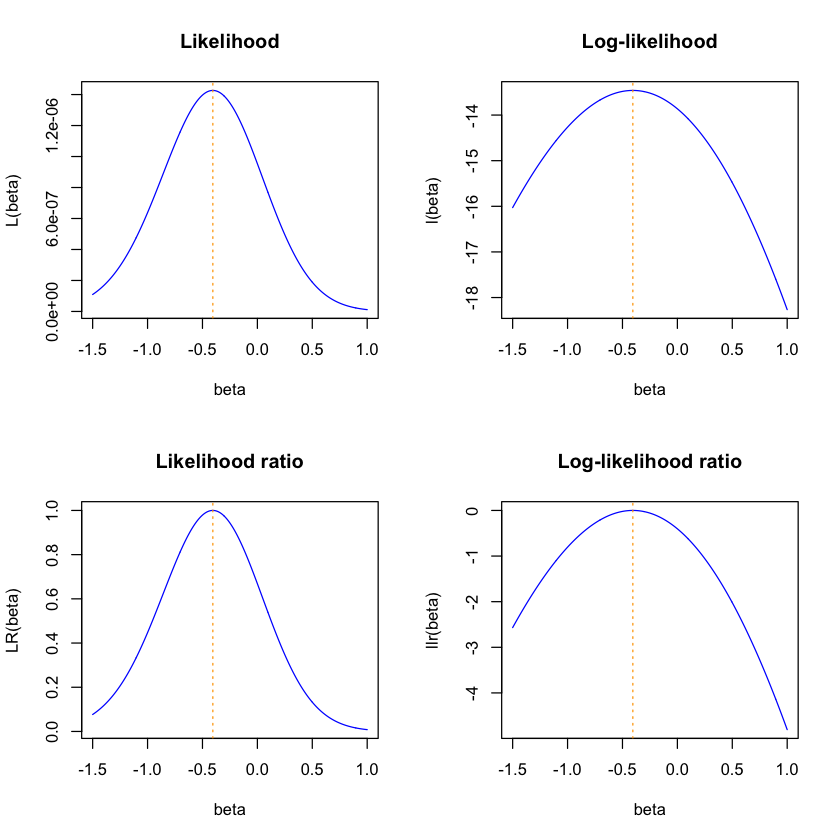

In [1]:
# Observed data 
n<- 20
y<- c(0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0)

# MLE
k <- sum(y)
ybar <- k/n
beta_hat <- log(ybar/(1 - ybar))

# Set range of betas over which to evaluate functions
beta <- seq(-1.5, 1, by = 0.004)

# Likelihood and loglikelihoods function
L <- exp(beta*k)/(1 + exp(beta))^n
l <- beta*k - n*log(1 + exp(beta))

# Likelihood ratio and log likelihood ratio
LR <- L/(exp(beta_hat*k)/(1 + exp(beta_hat))^n)
llr <- l - (beta_hat*k - n*log(1 + exp(beta_hat)))


# Graph the four functions
par(mfrow = c(2, 2)) 

plot(beta, L, type = "l", col="blue", main="Likelihood", ylab="L(beta)")
abline(v=beta_hat, col="orange", lty=3)

plot(beta, l, type = "l", col="blue", main="Log-likelihood", ylab="l(beta)")
abline(v=beta_hat, col="orange", lty=3)

plot(beta, LR, type = "l", col="blue", main="Likelihood ratio", ylab="LR(beta)")
abline(v=beta_hat, col="orange", lty=3)

plot(beta, llr, type = "l", col="blue", main="Log-likelihood ratio", ylab="llr(beta)")
abline(v=beta_hat, col="orange", lty=3)



## 15.14.2 Confidence intervals based on the likelihood

Remember that the likelihood is a measure of how consistent the different values of the parameter are with the observed data. The most consistent value is at the maximum, i.e. the maximum likelihood estimator. We can also see that values with a much lower likelihood are much less consistent with the data. 

This suggests the idea of obtaining a confidence interval by taking all values that have a likelihood within a certain range of the maximum. 

In fact, when we have a single parameter of interest (which we will call $\beta_0$) then it turns out that for an independent sample (under a number of "regularity" conditions not stated here), we have the following asymptotic distribution:


$$
-2 llr(\beta_0) = -2 (l(\beta_0) - l(\hat{\beta})) \sim \chi^2_1    \qquad \text{as} \ n \rightarrow \infty
$$

A $\chi^2_1$ distribution has 5% of the distribution above the value 3.84. Therefore, this means that

$$
P(-2 llr(\beta_0) \geq 3.84) = 0.95 \rightarrow P(llr(\beta_0) \geq  -1.92) = 0.95
$$

leading to the 95% confidence interval of all values of $\beta$ that have a log-likelihood ratio at most 1.92 units lower than the maximum:

$$
\{ \beta s.t. l(\beta) - l(\hat{\beta}) \geq -1.92\}
$$

The plot below shows the line -1.92. Our 95% confidence interval is formed by all values of $\beta$ which have a log-likelihood falling above this line. This is approximately the iterval: (-1.34, 0.48). The MLE and confidnence limits are shown in orange dashed lines.

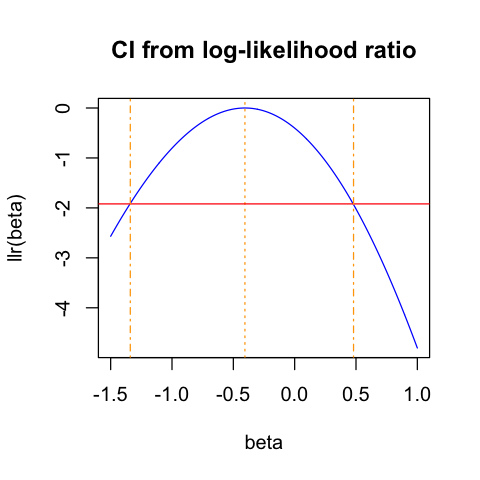

In [2]:
options(repr.plot.width=4, repr.plot.height=4)
par(mfrow = c(1, 1)) 
plot(beta, llr, col="blue", type = "l", main="CI from log-likelihood ratio", ylab="llr(beta)")
abline(v=beta_hat, col="orange", lty=3)
abline(h=-1.92, col="red")

abline(v=-1.34, col="orange", lty=4)
abline(v=0.48, col="orange", lty=4)




## 15.14.2 Quadratic approximation 

There is often no closed form solution to obtain the exact values at which the log-likelihood ratio takes value -1.92. An often simpler approach is to work instead with a quadratic approximation to the log-likelihood ratio, for which there is a simple closed-form solution.  

We will now make a quadratic approximation to the log likelihood ratio. In the plot above, we see that this graph is not quite symmetric but looks fairly quadratic near the maximum. 

To obtain our quadratic approximation, we will look for a function of the (quadratic) form:

$$
f(\beta) = -\frac{1}{2} \left( \frac{\beta - M}{S} \right)^2
$$

We want our quadratic approximation to
- have the same maximum
- have the same curvature near the maximum

The first condition above means that we need $f(\hat{\beta}) = 0$. This fixes $M = \hat{\beta}$. 

The second condition means that we need the second derivatives of $f(\beta)$ and $llr(\beta)$ to be equal at the MLE, $\hat{\beta}$, since curvature is measured by the second derivative. In fact, we will consider making the curvature (second derivatives) of $f(\beta)$ and $l(\beta)$ to be equal at the MLE, since this is algebraically a little simpler. From the plots above we can see that the curvature of $l(\beta)$ and $llr(\beta)$ are identical.

Differentiating $f(\beta)$ twice shows that $f''(\beta) = -1/S^2$ for any value of $\beta$. Thus we set

$$
S^2 = -\frac{1}{l''(\hat{\beta})}
$$

It also turns out that the resulting value for $S$ is also the standard error of $\hat{\beta}$, i.e. $S = SE(\hat{\beta})$.

This gives us our required quadratic approximation to the log-likelihood ratio:

$$
f(\beta) = -\frac{1}{2} \left( \frac{\beta - \hat{\beta}}{SE(\hat{\beta})} \right)^2  \qquad  \text{with SE obtained as: } SE^2 = -\frac{1}{l''(\hat{\beta})}
$$


### Example

Returning to our example, we take the second derivative of the log-likelihood to obtain $S$. First, we have already taken the first derivative to obtain our MLE:

$$
\begin{align*}
\frac{d l(\beta)}{d \beta} = \frac{d}{d \beta} \left\{ k \beta   - n log \left(1 + e^{\beta} \right)  \right\} = k - n \frac{e^{\beta}}{\left(1 + e^{\beta} \right)}
\end{align*}
$$

Taking the derivative of this, we get:

$$
\begin{align*}
\frac{d^2 l(\beta)}{d \beta^2} = \frac{d}{d \beta} \left\{ k - n \frac{e^{\beta}}{\left(1 + e^{\beta} \right)} \right\} = -\frac{n e^\beta}{\left(1 + e^{\beta} \right)^2}
\end{align*}
$$

Thus we set

$$
S^2 = -\frac{1}{l''(\hat{\beta})} =  \frac{\left(1 + e^{\hat{\beta}} \right)^2}{n e^\hat{\beta}}
$$

The figure below shows the log likelihood ratio and the quadratic approximation. 


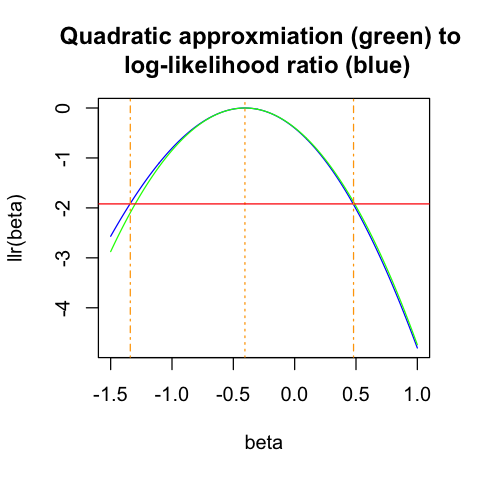

In [3]:
# Obtain S (i.e. the SE(beta_hat))
SE <- sqrt((n*exp(beta_hat)/(1 + exp(beta_hat))^2)^(-1))

# Obtain quadratic approximation to log-likelihood ratio:
f<- -1/2*((beta - beta_hat)/SE)^2 

# Plot
options(repr.plot.width=4, repr.plot.height=4)
par(mfrow = c(1, 1)) 
plot(beta, llr, col="blue", type = "l", main="Quadratic approxmiation (green) to \n log-likelihood ratio (blue)", ylab="llr(beta)")
lines(beta, f, col="green", type = "l")

# indicate MLE
abline(v=beta_hat, col="orange", lty=3)

# indicate log likelihood ratio confidence interval
abline(h=-1.92, col="red")
abline(v=-1.34, col="orange", lty=4)
abline(v=0.48, col="orange", lty=4)

The quadratic approximation is very good near to the maximum. The horizontal red line indicates the 95% confidence interval obtained using the log likelihood ratio. The quadratic approximation starts to deviate from the log likelihood ratio at that point, but not by much. overall, this plot suggests that the quadratic approximation will provide us with a 95% confidence interval very close to the one obtained directly from the log likelihood ratio. 

## 15.14.3 Quadratic approximation 

If our quadratic approximation is a good approximation to the log-likelihood ratio then we will have, approximately

$$
-2 f(\beta) \sim \chi^2_1
$$

Thus 

$$
-2 f(\beta) = -2 \times -\frac{1}{2} \left( \frac{\beta - \hat{\beta}}{SE(\hat{\beta})} \right)^2  \sim \chi^2_1
$$

In other words,

$$
\left( \frac{\beta - \hat{\beta}}{SE(\hat{\beta})} \right)^2  \sim \chi^2_1
$$

A $\chi^2_1$ distribution has 5% of the distribution above the value 3.84, so 

$$
P\left(\left( \frac{\beta - \hat{\beta}}{SE(\hat{\beta})} \right)^2  \geq 3.84\right)  = 0.95
$$

Noticing that $\sqrt{3.84} = 1.96$, this gives the 95% confidence interval:

$$
\hat{\beta} \pm 1.96 \times SE(\hat{\beta})
$$

This is sometimes called a **Wald-type** confidence interval. 

The plot below graphs the interval constructed in this way (indicated by the purple dashed lines), along with the previous  confidence interval calculated from the log-likelihood ratio. 

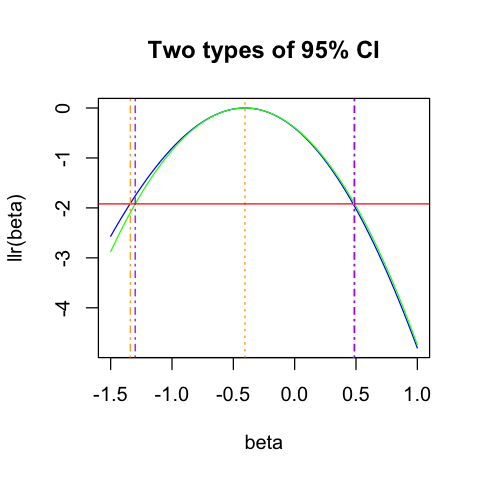

In [4]:
# Plot
options(repr.plot.width=4, repr.plot.height=4)
par(mfrow = c(1, 1)) 
plot(beta, llr, col="blue", type = "l", main="Two types of 95% CI", ylab="llr(beta)")
lines(beta, f, col="green", type = "l", ylab="llr(beta)")

# indicate MLE
abline(v=beta_hat, col="orange", lty=3)

# indicate log likelihood ratio confidence interval
abline(h=-1.92, col="red")
abline(v=-1.34, col="orange", lty=4)
abline(v=0.48, col="orange", lty=4)

# indicate Wald-type confidence interval (from quadratic approximation)
lower_lim <- beta_hat - 1.96*SE
upper_lim <- beta_hat + 1.96*SE
abline(v=lower_lim, col="purple", lty=4)
abline(v=upper_lim, col="purple", lty=4)

In the plot above, the two confidence intervals are very similar. 

## 15.14.4 Hypothesis testing

Suppose we wish to test the null hypothesis:

- $H_0: \beta = \beta_0$
- $H_1: \beta \neq \beta_0$


**Likelihood ratio test**

Under the null hypothesis,

$$
-2 llr(\beta_0) \sim \chi^2_1
$$

Tests can be based on this distribution, giving a p-value.

**Wald test**

Using the quadratic approximation, 

$$
\left( \frac{\beta - \hat{\beta}}{SE(\hat{\beta})} \right)^2  \sim \chi^2_1
$$

Or, equivalently:

$$
\left( \frac{\beta - \hat{\beta}}{SE(\hat{\beta})} \right)  \sim N(0,1)
$$


This is exactly the form of hypothesis tests we encountered in the session about hypothesis testing. 

## 15.14.5 Additional comments

Notes
> We often construct confidence intervals on the log scale (e.g. the log odds ratios). Confidence intervals based on the log likelihood ratio are transformation invariant, but Wald-type intervals are not. Often, basing calculations on a log scale improves the approximations made above. <br><br>
> We have focused on situations with a single unknown parameter. With more than one unknown parameter, things are a little more complex. The profile likelihood, which treats some parameters as "nuisance" parameters and *removes* them from the likelihood, using a process called profiling, is beyond the scope of these notes. The fundamental principles remain the same.
